 Lab 3, Summer 2021</center>



>> PLACE YOUR NAME HERE >>

**Overview:** In this lab assignment, you will execute a data analysis workflow to manipulate and analyze real data from multiple sources. The tasks associated with the lab will require you to:

* consolidate numerous daily conflict event files (~60 days) from a primary source
* enrich the consolidated event data with additional information
* report your results with appropriate visualization and analysis comments

**The Scenario:**  You are currently serving as a member of the Operations Research cell supporting the J5 Director of the Joint Staff (3-Star Flag Officer). The primary task of the J5 is to propose strategies, plans and policy recommendations directly to the Chairman of the Joint Chiefs of Staff (CJCS). The current CJCS is advocating for more data analysis products from the J5 to help better inform strategic decisions in the execution of the National Military Strategy. There currently exists a stalemate among the J5 deputy directors over how to assess ongoing global conflict events. Specifically, the deputy directors continue to struggle over how to identify the current 'hottest' conflict spots in the world given(as always) ongoing, complex geo-political events. It is your job as the OR analyst to help overcome this stalemate and provide relevant analytical products to better inform these key decision makers.  

Given the extremely positive feedback you received on our recent conflict event analysis research work (*Pandas Practicum*), we return to the ACLED as the primary source to complete our analysis task.
    
#### The Armed Conflict Location Event Data (ACLED) is a disaggregated conflict analysis and crisis mapping project.  

According to the ACLED project's website: https://www.acleddata.com/
 
```ACLED is the highest quality, most widely used, real-time data and analysis source on political violence and protest around the world. Practitioners, researchers, and governments depend on ACLED for the latest reliable information on current conflict and disorder patterns.```

For this assignment, you are provided a daily ACLED data file for the dates covering 18 DEC 2019 thru 15 FEB 2020 (60 days == 60 files). These files can be found in the `event_data` folder within the lab4.zip file on the course Sakai site.

*NOTE:* Your office receives these files on a daily basis automatically from the source. The automated 'push' process occurs at midnight daily, which sometimes results in a **duplication** of event records across daily files.

**Your Task:**  Write the necessary Python code to read, manipulate, analyze and visualize the conflict event data in order to answer the explicit questions posed in this lab assignment worksheet.  A few important notes on this assignment:

 * This notebook contains all of the questions for this lab assignment 
 * You will answer ALL questions and write/execute ALL applicable code within THIS notebook.


### While there is a lot of information available in the original ACLED data files (31 total columns), we have an explicit analysis interest in only some of the columns.  Those 11 columns are:
   * `data_id`
   * `event_date`
   * `event_type`
   * `sub_event_type`
   * `region`
   * `country`
   * `location`
   * `latitude`
   * `longitude`
   * `fatalities`
   * `iso3`
    

### Task 1a: Read all daily event files into a single dataframe called `event_df`

Consider breaking this overall effort into several steps:
1. Automatically obtain a list of all names of csv files in the directory
2. For a single one of these files, figure out how to read it into a pandas dataframe with only the 11 relevant columns listed above
3. Use a loop to perform step (2) for each of these files
4. Concatenate all the dataframes into a single dataframe

Note: you might combine some of the steps above.

In [2]:
# import required modules
import pandas as pd
import os
import glob
import csv
from csv import reader

In [3]:
os.chdir("/home/kai/Greynodes/90327/event-data")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# print(f)
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

/home/kai/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### Task 1b: Report summary statistics of the newly created `event_df` dataframe
We can now examine all of the events in the consolidated `event_df` dataframe by reporting some summary statistics of interest.  *Please report the following:*

* total number of unique events
* total number of unique event types
* total number of events by event type

#### Total Number of Unique Events
Report the total number of unique events contained in event_df

In [4]:
# Total number of unique events in event_df.
read_list = ['data_id', 'event_date', 'event_type', 'sub_event_type', 'region', 'country', 'location', 'latitude', 'longitude', 'fatalities', 'iso3']
df = pd.read_csv("combined_csv.csv", usecols=read_list)
df.head()

,data_id,event_date,event_type,sub_event_type,region,country,location,latitude,longitude,fatalities,iso3
0,6746880.0,15 January 2020,Battles,Armed clash,Europe,Ukraine,Zholobok,48.7146,38.6996,0.0,UKR
1,6722561.0,15 January 2020,Battles,Armed clash,Eastern Africa,Somalia,Bariirre,2.0476,44.8975,3.0,SOM
2,6861057.0,15 January 2020,Protests,Peaceful protest,Middle East,Israel,Jerusalem,31.7690,35.2163,0.0,ISR
3,6746369.0,15 January 2020,Protests,Peaceful protest,Southern Asia,India,Bareilly,28.3470,79.4219,0.0,IND
4,6746881.0,15 January 2020,Explosions/Remote violence,Shelling/artillery/missile attack,Europe,Ukraine,Zolote-5,48.6719,38.5600,0.0,UKR


In [5]:
df.isnull().sum()

data_id           912
event_date        912
event_type        912
sub_event_type    912
region            912
country           912
location          912
latitude          912
longitude         912
fatalities        912
iso3              414
dtype: int64

#### Total Number of Unique Event Types
Report the total number of unique event types.  That is the unique number of event types observed in the `event_type` column.

In [6]:
# Total number of unique event types in event_df.
data = pd.read_csv("combined_csv.csv")
  
# storing unique value in a variable
unique_value_id = data["data_id"].nunique()
unique_value_date = data["event_date"].nunique()
unique_value_type = data["event_type"].nunique()
unique_value_sub_type = data["sub_event_type"].nunique()
unique_value_region = data["region"].nunique()
unique_value_country = data["country"].nunique()
unique_value_location = data["location"].nunique()
unique_value_latitude = data["latitude"].nunique()
unique_value_longitude = data["longitude"].nunique()
unique_value_fatalities = data["fatalities"].nunique()
unique_value_iso3 = data["iso3"].nunique()

# printing value
print("Unique Data ID: ",unique_value_id)
print("Unique Event Date: ",unique_value_date)
print("Unique Event Type: ",unique_value_type)
print("Unique Sub Event Type: ",unique_value_sub_type)
print("Unique Region: ",unique_value_region)
print("Unique Country: ",unique_value_country)
print("Unique Location: ",unique_value_location)
print("Unique Latitude: ",unique_value_latitude)
print("Unique Longitude: ",unique_value_longitude)
print("Unique Fatalities: ",unique_value_fatalities)
print("Unique ISO3: ",unique_value_iso3)


Unique Data ID:  23321
Unique Event Date:  58
Unique Event Type:  6
Unique Sub Event Type:  24
Unique Region:  10
Unique Country:  93
Unique Location:  7127
Unique Latitude:  7174
Unique Longitude:  7226
Unique Fatalities:  44
Unique ISO3:  250


/home/kai/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Total Number of Events by Event Type
Report the total number of observed events for each event type.

In [7]:
# Total number of events for each event type
id_count = df['data_id'].value_counts()
event_count = df['event_date'].value_counts()
type_count = df['event_type'].value_counts()
region_count = df['region'].value_counts()
country_count = df['country'].value_counts()
sub_count = df['sub_event_type'].value_counts()
type_count = df['event_type'].value_counts()
location_count = df["location"].value_counts()
latitude_count = df["latitude"].value_counts()
longitude_count = df["longitude"].value_counts()
fatalities_count = df["fatalities"].value_counts()
iso3_count = df["iso3"].value_counts()


print("counts of Data ID: ",id_count)
print("counts of Event Date: ",event_count)
print("counts of Event Type: ",type_count)
print("counts of Sub Event Type: ",sub_count)
print("counts of Region: ",region_count)
print("counts of Country: ",country_count)
print("counts of Location: ",location_count)
print("counts of Latitude: ",latitude_count)
print("counts of Longitude: ",longitude_count)
print("counts of Fatalities: ",fatalities_count)
print("counts of ISO3: ",iso3_count)

counts of Data ID:  6719841.0    16
6708793.0    16
6815739.0    16
6713466.0    16
6815731.0    16
             ..
6761574.0     8
6761577.0     8
6761559.0     8
6720247.0     8
6869414.0     8
Name: data_id, Length: 23321, dtype: int64
counts of Event Date:  05 January 2020     6224
25 December 2019    5344
29 December 2019    5248
05 February 2020    4440
20 December 2019    4280
19 December 2019    4208
28 January 2020     4088
31 January 2020     3968
21 January 2020     3744
20 January 2020     3736
29 January 2020     3728
30 January 2020     3720
15 January 2020     3680
21 December 2019    3600
16 January 2020     3568
22 January 2020     3544
27 December 2019    3544
26 December 2019    3536
03 February 2020    3520
04 February 2020    3504
26 January 2020     3408
11 February 2020    3400
06 February 2020    3384
23 December 2019    3368
27 January 2020     3360
22 December 2019    3344
08 January 2020     3304
10 February 2020    3296
24 January 2020     3288
12 February 2

### Task 2: Add Geographic Combatant Command (COCOM) Context to Event Data
While ACLED data includes great geographical information (i.e. `region`,`country`,`location`,`latitude`,`longitude` and `iso3`), the Joint Staff views the world exclusively from a combatant command (COCOM) perspective. There are 11 U.S. COCOMs (7-geographic 4-functional), but we are only focused on the geographic COCOMs. Therefore, you will need to add a label to each conflict event that correctly identifies the geographic COCOM Area of Responsibility (AOR) in which it occured. This should be accomplished via the creation of a new column within `event_df` called `cocom`. This task, however, is not entirely straightforward at this point as we will have to incorporate additional data sources to be successful. 

<img src = "images/cocom_wiki_map.png" height = "800" width = "700" align="center"/>  







Map Image from: DOD Updater CC BY-SA 4.0 https://en.wikipedia.org/w/index.php?curid=62620678  

You have been provided a data source called `cocom_countries.csv` that provides a comprehensive list of countries that fall within each geographic combatant command. For the sake of this assignment, we will restrict the United States to just the Northern Command AOR (although it officially belongs to Indo-Pacific Command as well given Hawaii) and there is no requirement to include Space Command in our analysis at this time.

#### ISO 3166 Country Codes
 In order to establish the necessary COCOM perspective in this lab, you ultimately will have to conduct join/merge operations between your primary `event_df` and the provided `cocom_countries.csv`. The ISO code **will serve** as your 'primary key' to combine these two data sources.


A few notes on the ISO 3166 standard from https://www.iso.org/iso-3166-country-codes.html
``` 
The purpose of ISO 3166 is to define internationally recognised codes of letters and/or numbers that we can use when we refer to countries and subdivisions. However, it does not define the names of countries – this information comes from United Nations sources (Terminology Bulletin Country Names and the Country and Region Codes for Statistical Use maintained by the United Nations Statistics Divisions).

Using codes saves time and avoids errors as instead of using a country's name (which will change depending on the language being used) we can use a combination of letters and/or numbers that are understood all over the world.
```

Note, *however*, that the chosen ISO standard is different in both the `event_df` and the `cocom_countries.csv`


Given the difference in provided ISO codes, you must convert all `iso2` codes to `iso3` codes for consistency. To do this, you have been provided the file `iso_3166.xml` which is a current version of all ISO codes provided by ISO.  

**In order to accomplish Task 2, one must break the problem down into explicit steps.**


### Task 2A: Read in the `cocom_countries.csv` file as a DataFrame called `cocom_df`

In [8]:
# Ensure you navigate to the appropriate directory that contains cocom_countries.csv

# Your code here >>>>

comm_df = pd.read_csv("/home/kai/Greynodes/90327/cocomcountries.csv")

comm_df.head()

,COCOM,country,iso_2
0,USCENTCOM,Afghanistan,AF
1,USEUCOM,Albania,AL
2,USAFRICOM,Algeria,DZ
3,USEUCOM,Andorra,AD
4,USAFRICOM,Angola,AO


In [9]:
print(comm_df)

           COCOM         country iso_2
0      USCENTCOM     Afghanistan    AF
1        USEUCOM         Albania    AL
2      USAFRICOM         Algeria    DZ
3        USEUCOM         Andorra    AD
4      USAFRICOM          Angola    AO
..           ...             ...   ...
202  USINDOPACOM         Vietnam    VN
203    USAFRICOM  Western Sahara    EH
204    USCENTCOM           Yemen    YE
205    USAFRICOM          Zambia    ZM
206    USAFRICOM        Zimbabwe    ZW

[207 rows x 3 columns]


### Task 2B: Read in the `iso_3166.xml` file and extract all country `iso2` and `iso3` codes  
The following code is provided for you to execute Task 2B. The resulting output is a dataframe called `iso_df` which contains all extracted `iso2` and `iso3` codes.

In [10]:
# Ensure you navigate to the appropriate directory that contains the XML file

######################################################################
### REFER BACK TO WEB_DATA LECTURE TO REFRESH FAMILIARITY WITH XML ###
### NOTE: YOU DO NOT NEED TO CHANGE ANYTHING IN THIS CELL ############

import xml.etree.ElementTree as ET
tree = ET.parse('/home/kai/Greynodes/90327/iso_3166.xml')
root = tree.getroot()

# Create empty dataframe to store extracted iso codes
iso_df = pd.DataFrame(columns=['iso2', 'iso3'])
iso_df

# List placeholders
iso2_list = []
iso3_list = []

# Extract iso2/3 for each country element
for country in root.findall('country'):
    iso2 = country.get('alpha-2')
    iso3 = country.get('alpha-3')

    # add iso values to respective lists
    iso2_list.append(iso2)
    iso3_list.append(iso3)

# Add values to iso_df as new columns (after simple len test)
if len(iso2_list) == len(iso3_list):
    iso_df['iso2'] = iso2_list
    iso_df['iso3'] = iso3_list

# View the last 5 rows of iso_dfcocom_countries.csv
iso_df.tail()

,iso2,iso3
244,WF,WLF
245,EH,ESH
246,YE,YEM
247,ZM,ZMB
248,ZW,ZWE


### Task 2C: Add  `iso3` codes to all countries within the `cocom_df` 
In this task, you must carefully consider how to merge `iso_df` with `cocom_df`.

In [11]:
# Your code here to merge these sources >>>>>>
concat_data = pd.concat([comm_df, iso_df])

In [12]:
print(concat_data)

         COCOM      country iso_2 iso2 iso3
0    USCENTCOM  Afghanistan    AF  NaN  NaN
1      USEUCOM      Albania    AL  NaN  NaN
2    USAFRICOM      Algeria    DZ  NaN  NaN
3      USEUCOM      Andorra    AD  NaN  NaN
4    USAFRICOM       Angola    AO  NaN  NaN
..         ...          ...   ...  ...  ...
244        NaN          NaN   NaN   WF  WLF
245        NaN          NaN   NaN   EH  ESH
246        NaN          NaN   NaN   YE  YEM
247        NaN          NaN   NaN   ZM  ZMB
248        NaN          NaN   NaN   ZW  ZWE

[456 rows x 5 columns]


### Task 2D: We are finally ready to add COCOM info by merging on `iso3` codes
NOTE: We already have a `country` column within the `event_df`, so to avoid confusion just drop the `country` column within the `cocom_df` prior to merging on `iso3`

In [13]:
# Drop country column from cocom_df >>>>>
comm_df.drop('country', inplace=True, axis=1)

In [14]:
print(comm_df)

           COCOM iso_2
0      USCENTCOM    AF
1        USEUCOM    AL
2      USAFRICOM    DZ
3        USEUCOM    AD
4      USAFRICOM    AO
..           ...   ...
202  USINDOPACOM    VN
203    USAFRICOM    EH
204    USCENTCOM    YE
205    USAFRICOM    ZM
206    USAFRICOM    ZW

[207 rows x 2 columns]


In [15]:
# Conduct merge operation >>>>>
merge = pd.concat([comm_df, iso_df])
combination = merge.to_csv("concat_data.csv", index=False, encoding='utf-8-sig')

In [16]:
# Verify merge operation >>>>>
verify_merge = pd.read_csv("concat_data.csv")
verify_merge.head()

,COCOM,iso_2,iso2,iso3
0,USCENTCOM,AF,NaN,NaN
1,USEUCOM,AL,NaN,NaN
2,USAFRICOM,DZ,NaN,NaN
3,USEUCOM,AD,NaN,NaN
4,USAFRICOM,AO,NaN,NaN


## Task 3: Analyze COCOM Patterns
The primary dispute within the J5 is the inability to decide upon an appropriate conflict metric to compare the **four primary geographic COCOMs of interest: AFRICOM, CENTCOM, EUCOM, INDOPACOM.** One group of J5 deputies believes that **total events that occur within a COCOM over time** is a good barometer to assess an AOR as a dangerous 'hotspot', while other deputies believe that approach is too generic. This other competing perspective believes that **total deaths that occur from conflict events within a COCOM over time** is a better approach.

Your specific analysis tasks are as follows (Tasks 3A-3C)

### Task 3A: Visualize the total number of conflict events over time within each COCOM of interest
Please provide a line plot visualization showing a direct comparison of daily event accounts within the **four primary geographic COCOMs of interest** over the entire time frame of the `event_df`.  

Please include the following with your plot:
* dedicated plot line for each of the four COCOMs with individual color scheme
* custom xlabel, ylabel and title
* text interpreting the results of your visualization

#### CREATE PLOT 3A HERE

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px

In [18]:
print("counts of Country: ",country_count)

counts of Country:  India                   28568
Syria                   22296
Ukraine                 17968
Afghanistan             15440
Yemen                   15384
                        ...  
Rwanda                     16
Republic of Congo          16
Oman                        8
eSwatini                    8
United Arab Emirates        8
Name: country, Length: 93, dtype: int64


(28568, 22296, 17968, 15440)


Text(0.5, 1.0, 'Total number of Conflict Events')

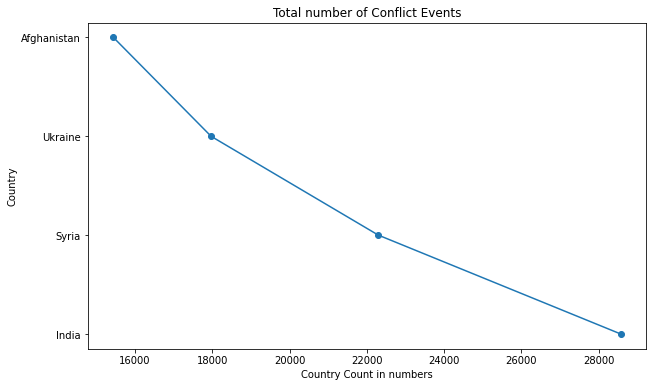

In [67]:

country_graph = (country_count[0], country_count[1], country_count[2], country_count[3])
def_country = ["India", "Syria", "Ukraine", "Afghanistan"]
print(country_graph)
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(country_graph, def_country)
ax.scatter(country_graph, def_country)

plt.xlabel("Country Count in numbers")
plt.ylabel("Country")
plt.title("Total number of Conflict Events")

#### INTERPRET PLOT 3A HERE (WITH SUPPORTING TEXT)
>>>

### Task 3B: Visualize the total number of deaths that result from conflict events over time within each COCOM of interest
Please provide a line plot visualization showing a direct comparison of daily death accounts within the **four primary geographic COCOMs of interest** over the entire time frame of the `event_df`.  

Please include the following with your plot:
* dedicated plot line for each of the four COCOMs with individual color scheme
* custom xlabel, ylabel and title
* text interpreting the results of your visualization

#### CREATE PLOT 3B HERE

Text(0.5, 1.0, 'Total number of deaths')

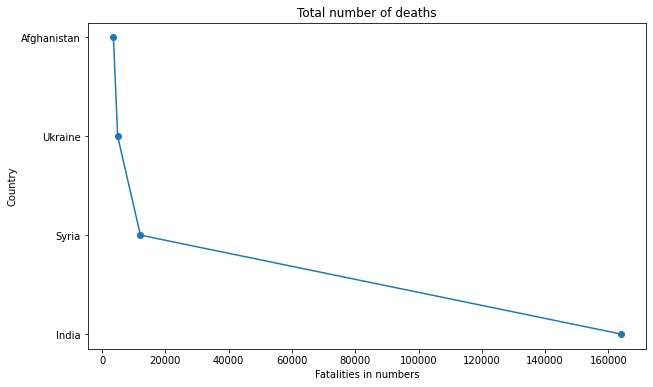

In [68]:

death = (fatalities_count[0], fatalities_count[1], fatalities_count[2], fatalities_count[3])
def_country = ["India", "Syria", "Ukraine", "Afghanistan"]

fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.plot(death, def_country)
ax.scatter(death, def_country)
plt.xlabel("Fatalities in numbers")
plt.ylabel("Country")
plt.title("Total number of deaths")


#### INTERPRET PLOT 3B HERE (WITH SUPPORTING TEXT) 
* Additionally, identify the specific event producing the most fatalities.
>>>

### Task 3C: Visualize the total number of events by `event_type` within each COCOM of interest
Please create a **stacked bar chart** visualization that provides an individual 'stacked bar' capturing the total number of events by `event_type` for each of the **four primary geographic COCOMs of interest** over the entire time frame of `event_df`.  

Please include the following with your plot:
* dedicated stacked bar for each of the four COCOMs
* custom xlabel, ylabel and title
* text interpreting the results of your visualization

#### CREATE PLOT 3C HERE

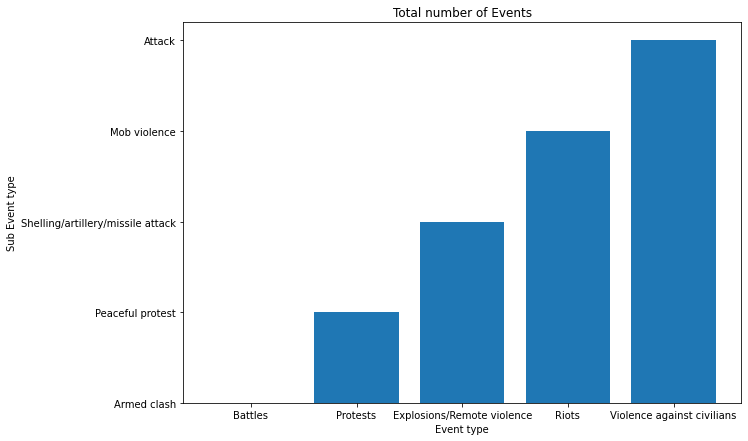

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
 
# Read CSV into pandas
data = pd.read_csv(r"/home/kai/Greynodes/90327/event-data/combined_csv.csv")
data.head()
df = pd.DataFrame(data)
 
eve = df['sub_event_type'].head(12)
nav = df['event_type'].head(12)
 
fig = plt.figure(figsize =(10, 7))
 
plt.bar(nav[0:10], eve[0:10])

plt.xlabel("Event type")
plt.ylabel("Sub Event type")
plt.title("Total number of Events")


plt.show()



#### INTERPRET PLOT 3C HERE (WITH SUPPORTING TEXT) 
>>>

### Task 4: Create an interactive map displaying conflict events

The J5 is **EXTREMELY** interested in observable conflict events that took place around the time of the downing of a commerical airliner in Iran on 8 JAN 2020 (https://en.wikipedia.org/wiki/Ukraine_International_Airlines_Flight_752). As part of this interest, the J5 requested that you design, create, and present an interactive map visualization that plots all conflict events that occurred on January 7th and 8th within the CENTCOM AOR.  

Please provide code below showing how to create an interactive map capturing CENTCOM conflict events on January 7th and 8th (2020) using the `folium` python module. Each conflict event should result in the creation of an individual `folium` Marker that contains the following information (derived from the associated dataframe column):
* `Event`
* `Location`
* `Country`
  

NOTE: There are many added features that you could consider including in your resulting folium map. At a minimum, include an individual Marker with the information listed above, while also considering centering your map on the AOR.  Feel free to explore additional features to enhance your final map presentation.


In [70]:
import folium

In [85]:
# Subset to necessary events here >>> use more cells as necessary

country_geo = '/home/kai/Greynodes/90327/world-countries.json'
data_geo = pd.read_csv('/home/kai/Greynodes/90327/countries.csv')
data_geo.shape

(5656458, 6)

In [91]:

hist_indicator =  'Life expectancy at birth'
hist_year = 2013
mask1 = data_geo['IndicatorName'].str.contains(hist_indicator) 
mask2 = data_geo['Year'].isin([hist_year])

# apply our mask
stage = data_geo[mask1 & mask2]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377669,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,72.536117
5377670,Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,68.848383
5377671,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,70.631305
5378129,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,74.757382
5378130,Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,69.183365


In [92]:
data_to_plot = stage[['CountryCode','Value']]
data_to_plot.head()

,CountryCode,Value
5377669,ARB,72.536117
5377670,ARB,68.848383
5377671,ARB,70.631305
5378129,CSS,74.757382
5378130,CSS,69.183365


In [93]:
hist_indicator = stage.iloc[0]['IndicatorName']

In [94]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [95]:
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicator)


/home/kai/.local/lib/python3.6/site-packages/folium/folium.py:413: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [96]:
country_geo = 'world-countries.json'

In [97]:
map.save('plot_data.html')